In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5//ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [8]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5//ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-8-18a9889f9f3b>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [9]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
2,4.0,Super product,This review is after using this phone for 2 mo...,3 June 2023
3,4.0,Camera,Wide angle camera ki kami h,9 June 2023
4,4.0,Camera+Betrey,Nice battery+camera is amazing 🤩,9 June 2023
...,...,...,...,...
10075,5.0,It's very good👍,"Fantastic camara quality and futures,",Reviewed in India 🇮🇳 on 17 November 2022
10076,5.0,Nice mobile,Purchased on 10 June 2022. Delivery on promise...,Reviewed in India 🇮🇳 on 12 June 2022
10077,5.0,Good work,Battery good and camera also good,Reviewed in India 🇮🇳 on 12 November 2022
10078,4.0,Awesome,Very nice,Reviewed in India 🇮🇳 on 6 June 2022


In [10]:
df.to_csv("Reviewlist.csv")

## **Import Libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [13]:
from google.colab import files
data = files.upload()

Saving Reviewlist.csv to Reviewlist (1).csv


In [14]:
import io

In [15]:
# load the dataset
reviews=pd.read_csv('Reviewlist.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
2,4.0,Super product,This review is after using this phone for 2 mo...,3 June 2023
3,4.0,Camera,Wide angle camera ki kami h,9 June 2023
4,4.0,Camera+Betrey,Nice battery+camera is amazing 🤩,9 June 2023
...,...,...,...,...
10075,5.0,It's very good👍,"Fantastic camara quality and futures,",Reviewed in India 🇮🇳 on 17 November 2022
10076,5.0,Nice mobile,Purchased on 10 June 2022. Delivery on promise...,Reviewed in India 🇮🇳 on 12 June 2022
10077,5.0,Good work,Battery good and camera also good,Reviewed in India 🇮🇳 on 12 November 2022
10078,4.0,Awesome,Very nice,Reviewed in India 🇮🇳 on 6 June 2022


## **Data Exploration**

In [16]:
reviews.Rating.describe()

count    10080.000000
mean         4.091369
std          0.866346
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

**Number of Words**

In [17]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,I've purchased the 6GB version of this phone w...,299
1,I will try to keep this review short. This rev...,216
2,This review is after using this phone for 2 mo...,61
3,Wide angle camera ki kami h,6
4,Nice battery+camera is amazing 🤩,5


**Number of characters**

In [18]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,I've purchased the 6GB version of this phone w...,1715.0
1,I will try to keep this review short. This rev...,1189.0
2,This review is after using this phone for 2 mo...,355.0
3,Wide angle camera ki kami h,27.0
4,Nice battery+camera is amazing 🤩,32.0


**Average Word Length**

In [19]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,I've purchased the 6GB version of this phone w...,4.755034
1,I will try to keep this review short. This rev...,4.509259
2,This review is after using this phone for 2 mo...,4.836066
3,Wide angle camera ki kami h,3.666667
4,Nice battery+camera is amazing 🤩,5.600000


**Number of stopwords**

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,I've purchased the 6GB version of this phone w...,128
1,I will try to keep this review short. This rev...,94
2,This review is after using this phone for 2 mo...,22
3,Wide angle camera ki kami h,0
4,Nice battery+camera is amazing 🤩,1


**Number of special characters**

In [21]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,I've purchased the 6GB version of this phone w...,0
1,I will try to keep this review short. This rev...,0
2,This review is after using this phone for 2 mo...,0
3,Wide angle camera ki kami h,0
4,Nice battery+camera is amazing 🤩,0


**Number of numerics**

In [22]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,I've purchased the 6GB version of this phone w...,2
1,I will try to keep this review short. This rev...,0
2,This review is after using this phone for 2 mo...,3
3,Wide angle camera ki kami h,0
4,Nice battery+camera is amazing 🤩,0


**Number of Uppercase words**

In [23]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,I've purchased the 6GB version of this phone w...,4
1,I will try to keep this review short. This rev...,3
2,This review is after using this phone for 2 mo...,1
3,Wide angle camera ki kami h,0
4,Nice battery+camera is amazing 🤩,0


In [27]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

**Spelling correction**

We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’

In [28]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    I will try to keep this review short. His revi...
2    His review is after using this phone for 2 mon...
3                            Side angle camera i ami h
4                     Vice battery+camera is amazing 🤩
Name: Review, dtype: object

## **Feature Engineering**

In [29]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0              19
1              12
2               3
3               9
4               9
           ...   
10075    Reviewed
10076    Reviewed
10077    Reviewed
10078    Reviewed
10079    Reviewed
Name: Review_Date, Length: 10080, dtype: object 
 0        December
1         January
2            June
3            June
4            June
           ...   
10075          in
10076          in
10077          in
10078          in
10079          in
Name: Review_Date, Length: 10080, dtype: object 
 0         2022
1         2023
2         2023
3         2023
4         2023
         ...  
10075    India
10076    India
10077    India
10078    India
10079    India
Name: Review_Date, Length: 10080, dtype: object


**Spliting Review Date into Three seperate Columns (Year,Month,Day)**

In [30]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,19,December,2022
1,12,January,2023
2,3,June,2023
3,9,June,2023
4,9,June,2023
...,...,...,...
10075,Reviewed,in,India
10076,Reviewed,in,India
10077,Reviewed,in,India
10078,Reviewed,in,India


In [31]:
df.Month.value_counts()

in           5130
May           587
April         531
March         498
November      435
October       400
June          390
August        386
December      385
January       358
February      341
September     331
July          308
Name: Month, dtype: int64

**Change 'month' from words to numbers for easier analysis**

In [32]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,December
1,January
2,6
3,6
4,6
...,...
10075,in
10076,in
10077,in
10078,in


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10080 non-null  float64
 1   Title        10076 non-null  object 
 2   Review       9730 non-null   object 
 3   Review_Date  10080 non-null  object 
 4   hashtags     10080 non-null  int64  
 5   Date         10080 non-null  object 
 6   Month        10080 non-null  object 
 7   Year         10080 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 630.1+ KB


In [42]:
import pandas as pd

# Assuming df1 is your DataFrame
df1['Date'] = pd.to_numeric(df1['Date'], errors='coerce')
df1['Year'] = pd.to_numeric(df1['Year'], errors='coerce')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    10080 non-null  float64
 1   Title     10076 non-null  object 
 2   Review    9730 non-null   object 
 3   hashtags  10080 non-null  int64  
 4   Date      4950 non-null   float64
 5   Month     10080 non-null  object 
 6   Year      4950 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 551.4+ KB


**Dropping the Original Columns after splitting the data**

In [35]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,hashtags,Date,Month,Year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,0,19,December,2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,0,12,January,2023
2,4.0,Super product,This review is after using this phone for 2 mo...,0,3,6,2023
3,4.0,Camera,Wide angle camera ki kami h,0,9,6,2023
4,4.0,Camera+Betrey,Nice battery+camera is amazing 🤩,0,9,6,2023


In [36]:
df

,Rating,Title,Review,Review_Date,hashtags,Date,Month,Year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022,0,19,December,2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023,0,12,January,2023
2,4.0,Super product,This review is after using this phone for 2 mo...,3 June 2023,0,3,June,2023
3,4.0,Camera,Wide angle camera ki kami h,9 June 2023,0,9,June,2023
4,4.0,Camera+Betrey,Nice battery+camera is amazing 🤩,9 June 2023,0,9,June,2023
...,...,...,...,...,...,...,...,...
10075,5.0,It's very good👍,"Fantastic camara quality and futures,",Reviewed in India 🇮🇳 on 17 November 2022,0,Reviewed,in,India
10076,5.0,Nice mobile,Purchased on 10 June 2022. Delivery on promise...,Reviewed in India 🇮🇳 on 12 June 2022,0,Reviewed,in,India
10077,5.0,Good work,Battery good and camera also good,Reviewed in India 🇮🇳 on 12 November 2022,0,Reviewed,in,India
10078,4.0,Awesome,Very nice,Reviewed in India 🇮🇳 on 6 June 2022,0,Reviewed,in,India


## **Data Visualization**

**date versus review count**

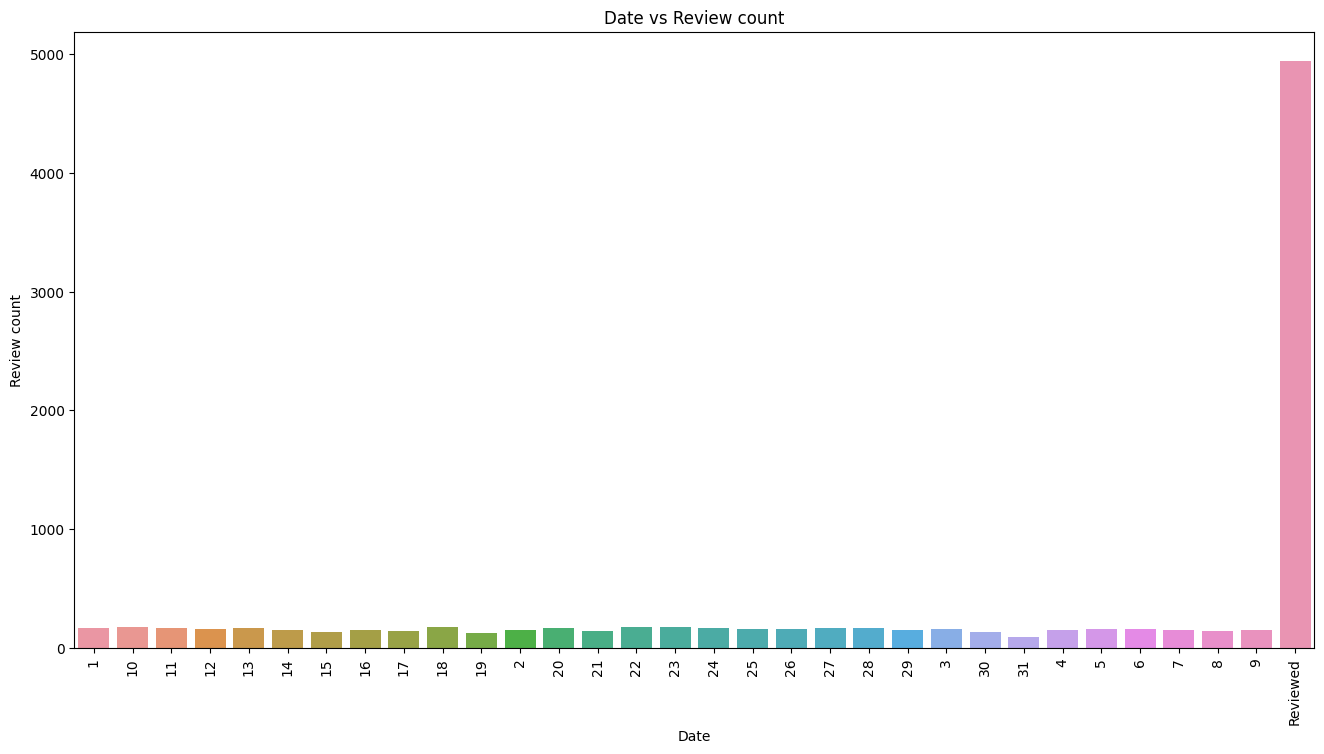

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))

# Convert the 'Date' column to string type
dayreview['Date'] = dayreview['Date'].astype(str)

sns.barplot(x="Date", y="Review", data=dayreview)
plt.title('Date vs Review count')
plt.xlabel('Date')
plt.ylabel('Review count')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

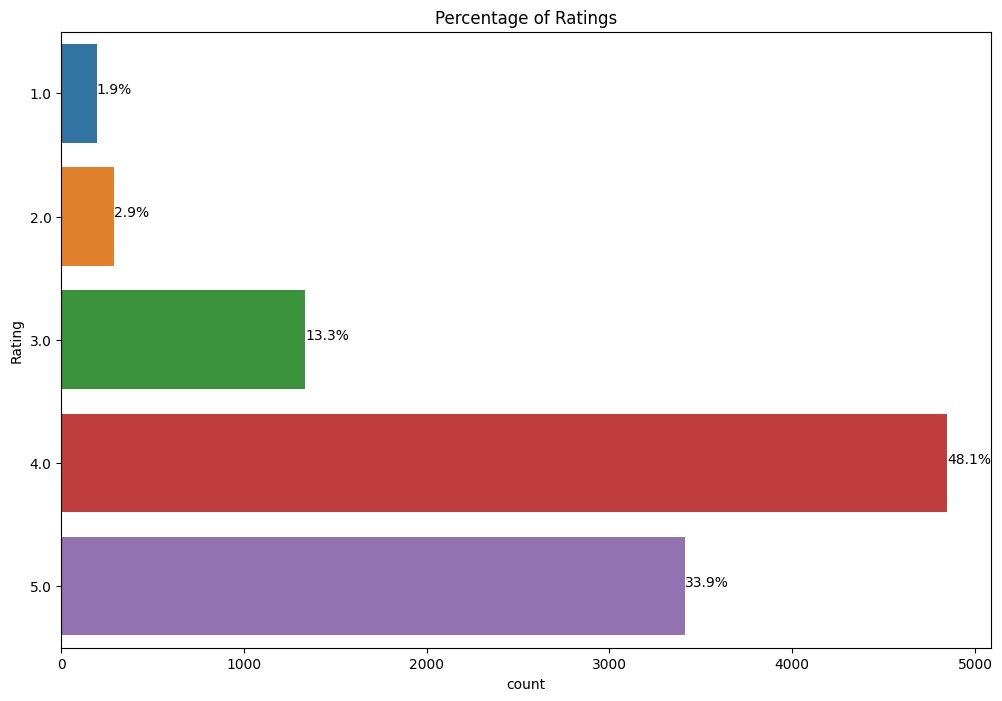

In [47]:

plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

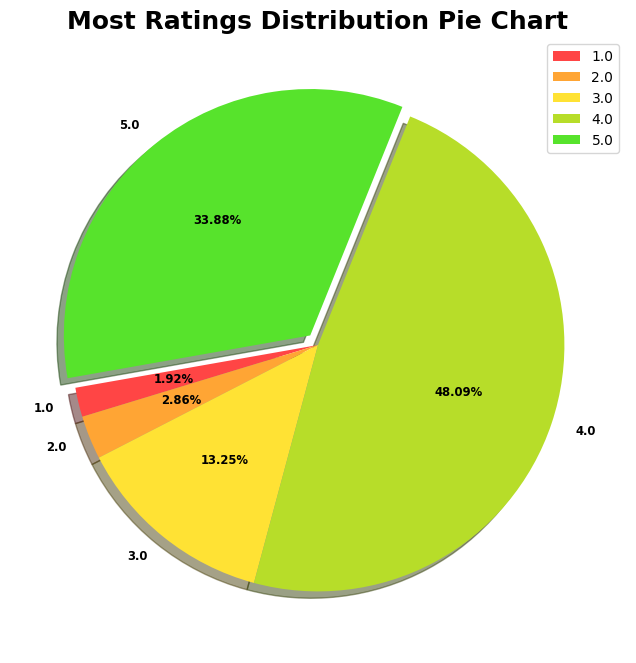

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.pie(df['Rating'].value_counts().sort_index(),
        labels=df['Rating'].value_counts().sort_index().index,
        explode=[0.0, 0.0, 0.0, 0.0, 0.05],
        autopct='%.2f%%',
        colors=["#ff4545", "#ffa534", '#ffe234', '#b7dd29', '#57e32c'],
        shadow=True,
        startangle=190,
        textprops={'size': 'small',
                   'fontweight': 'bold',
                   'color': 'black'})

plt.legend(loc='upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize=18, fontweight='bold')
plt.show()


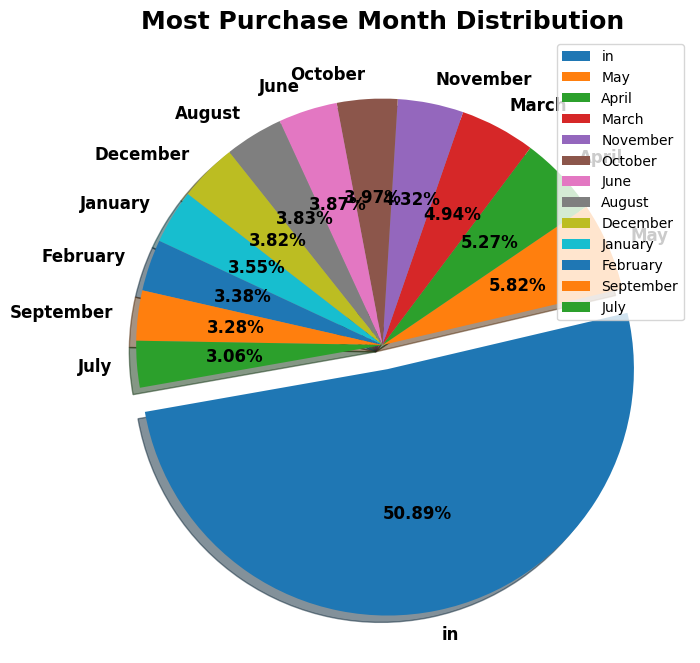

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

explode = [0.1] + [0.0] * (len(df['Month'].value_counts()) - 1)

plt.pie(df['Month'].value_counts(),
        labels=df['Month'].value_counts().index,
        explode=explode,
        autopct='%.2f%%',
        shadow=True,
        startangle=190,
        textprops={'size': 'large',
                   'fontweight': 'bold',
                   'color': 'black'})

plt.legend(loc='upper right')
plt.title("Most Purchase Month Distribution", fontsize=18, fontweight='bold')
plt.show()


## **BasicText Preprocessing**

### **For Sentiment Analysis**

**keeping the DataFrame intact and each tweets separate from each other**

In [52]:
data = df[['Review']]
data

,Review
0,I've purchased the 6GB version of this phone w...
1,I will try to keep this review short. This rev...
2,This review is after using this phone for 2 mo...
3,Wide angle camera ki kami h
4,Nice battery+camera is amazing 🤩
...,...
10075,"Fantastic camara quality and futures,"
10076,Purchased on 10 June 2022. Delivery on promise...
10077,Battery good and camera also good
10078,Very nice


In [53]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [54]:
data

,Review
0,i've purchased 6gb version phone comes extenda...
1,i try keep review short. this review perspecti...
2,this review using phone 2 months.very nice pho...
3,wide angle camera ki kami h
4,nice battery+camera amazing 🤩
...,...
10075,"fantastic camara quality futures,"
10076,purchased 10 june 2022. delivery promised date...
10077,battery good camera also good
10078,very nice


In [55]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/10080 [00:00<?, ?it/s]

In [56]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,wide angle camera ki kami h,Wide angle camera ki kami h
4,nice battery camera amazing,Nice battery+camera is amazing 🤩


## **Text Pre-processing Techniques**

### **Pre-processing 'Key Words'**

**Removing '@names'**


In [57]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [58]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,wide angle camera ki kami h,Wide angle camera ki kami h
4,nice battery camera amazing,Nice battery+camera is amazing 🤩
5,thnx amazon one plus,Thnx amazon and one plus
6,bought mother required,I bought it for my mother and this is as required
7,good,Very good
8,nice phone good image quality,"Nice phone, good image quality 👍🏻😄"
9,oneplus undoubtedly best brand town one worth ...,OnePlus are undoubtedly the best brand in town...


### **Removing links (http | https)**

In [59]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,wide angle camera ki kami h,Wide angle camera ki kami h
4,nice battery camera amazing,Nice battery+camera is amazing 🤩
5,thnx amazon one plus,Thnx amazon and one plus
6,bought mother required,I bought it for my mother and this is as required
7,good,Very good
8,nice phone good image quality,"Nice phone, good image quality 👍🏻😄"
9,oneplus undoubtedly best brand town one worth ...,OnePlus are undoubtedly the best brand in town...


### **Removing Review with empty text**

In [60]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,wide angle camera ki kami h,Wide angle camera ki kami h
4,nice battery camera amazing,Nice battery+camera is amazing 🤩
5,thnx amazon one plus,Thnx amazon and one plus
6,bought mother required,I bought it for my mother and this is as required
7,good,Very good
8,nice phone good image quality,"Nice phone, good image quality 👍🏻😄"
9,oneplus undoubtedly best brand town one worth ...,OnePlus are undoubtedly the best brand in town...


### **Dropping duplicate rows**

In [61]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,wide angle camera ki kami h,Wide angle camera ki kami h
4,nice battery camera amazing,Nice battery+camera is amazing 🤩
5,thnx amazon one plus,Thnx amazon and one plus
6,bought mother required,I bought it for my mother and this is as required
7,good,Very good
8,nice phone good image quality,"Nice phone, good image quality 👍🏻😄"
9,oneplus undoubtedly best brand town one worth ...,OnePlus are undoubtedly the best brand in town...


### **Resetting index**

**It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.**

In [62]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,wide angle camera ki kami h,Wide angle camera ki kami h
4,nice battery camera amazing,Nice battery+camera is amazing 🤩
5,thnx amazon one plus,Thnx amazon and one plus
6,bought mother required,I bought it for my mother and this is as required
7,good,Very good
8,nice phone good image quality,"Nice phone, good image quality 👍🏻😄"
9,oneplus undoubtedly best brand town one worth ...,OnePlus are undoubtedly the best brand in town...


### **Removing Punctuations, Numbers and Special characters**


**This step should not be followed if we also want to do sentiment analysis on key phrases as well, because semantic meaning in a sentence needs to be present. So here we will create one additional column 'absolute_tidy_tweets' which will contain absolute tidy words which can be further used for sentiment analysis on key words.**

In [63]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [64]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,wide angle camera ki kami h,Wide angle camera ki kami h
4,nice battery camera amazing,Nice battery+camera is amazing 🤩
5,thnx amazon one plus,Thnx amazon and one plus
6,bought mother required,I bought it for my mother and this is as required
7,good,Very good
8,nice phone good image quality,"Nice phone, good image quality 👍🏻😄"
9,oneplus undoubtedly best brand town one worth ...,OnePlus are undoubtedly the best brand in town...


### **Function to remove emoji**

In [65]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [66]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,wide angle camera ki kami h,Wide angle camera ki kami h
4,nice battery camera amazing,Nice battery+camera is amazing 🤩
5,thnx amazon one plus,Thnx amazon and one plus
6,bought mother required,I bought it for my mother and this is as required
7,good,Very good
8,nice phone good image quality,"Nice phone, good image quality 👍🏻😄"
9,oneplus undoubtedly best brand town one worth ...,OnePlus are undoubtedly the best brand in town...


In [67]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,"[purchased, gb, version, phone, come, extendab..."
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...,"[try, keep, review, short, review, perspective..."
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...,"[review, using, phone, month, nice, phone, bud..."
3,wide angle camera ki kami h,Wide angle camera ki kami h,"[wide, angle, camera, ki, kami, h]"
4,nice battery camera amazing,Nice battery+camera is amazing 🤩,"[nice, battery, camera, amazing]"
5,thnx amazon one plus,Thnx amazon and one plus,"[thnx, amazon, one, plus]"
6,bought mother required,I bought it for my mother and this is as required,"[bought, mother, required]"
7,good,Very good,[good]
8,nice phone good image quality,"Nice phone, good image quality 👍🏻😄","[nice, phone, good, image, quality]"
9,oneplus undoubtedly best brand town one worth ...,OnePlus are undoubtedly the best brand in town...,"[oneplus, undoubtedly, best, brand, town, one,..."


In [68]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

### **Removing Stop words**

**With the same reason we mentioned above, we won't perform this on 'Clean-Review' column, because it needs to be used for key_phrases sentiment analysis.**

In [70]:
from google.colab import files
data = files.upload()

Saving stop.txt to stop.txt


In [71]:
df = pd.read_csv('stop.txt',header=0,parse_dates=True)

In [72]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [73]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [74]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,wide angle camera ki kami h,Wide angle camera ki kami h
4,nice battery camera amazing,Nice battery+camera is amazing 🤩
5,thnx amazon one plus,Thnx amazon and one plus
6,bought mother required,I bought it for my mother and this is as required
7,good,Very good
8,nice phone good image quality,"Nice phone, good image quality 👍🏻😄"
9,oneplus undoubtedly best brand town one worth ...,OnePlus are undoubtedly the best brand in town...


### **Tokenize 'Clean_Reviews'**

In [75]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['try', 'keep', 'review', 'short', 'review', 'perspective', 'average', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'without', 'complaining', 'much', 'always', 'better', 'device', 'price', 'use', 'tool', 'nothing', 'much', 'pro', 'camera', 'pretty', 'good', 'con', 'software', 'sweet', 'little', 'feature', 'one', 'plus', 'make', 'sweet', 'negative', 'speed', 'power', 'run', 'apps', 'people', 'use', 'generally', 'without', 'issue', 'build', 'quality', 'good', 'well', 'given', 'going', 'use', 'sort', 'case', 'con', 'con', 'see', 'battery', 'need', 'charge', 'twice', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'youtube', 'instagram', 'facebook', 'medium', 'apps', 'like', 'hour', 'two', 'mid', 'brightness', 'maximum', 'achievable', 'screen', 'time', 'around', 'hour', 'given', 'high', 'speed', 'charger', 'battery', 'really', 'issue', 'tweaking', 'around', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'unnecessary', 'apps', 'backgro

In [76]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [purchased, gb, version, phone, come, extendab...
1    [try, keep, review, short, review, perspective...
2    [review, using, phone, month, nice, phone, bud...
3                   [wide, angle, camera, ki, kami, h]
4                     [nice, battery, camera, amazing]
5                            [thnx, amazon, one, plus]
6                           [bought, mother, required]
7                                               [good]
8                  [nice, phone, good, image, quality]
9    [oneplus, undoubtedly, best, brand, town, one,...
Name: Clean_Reviews, dtype: object

### **Converting words to Stemmer**

In [77]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [78]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,purchas gb version phone come extend gb ram vi...
1,tri keep review short review perspect averag u...
2,review use phone month nice phone budget ram e...
3,wide angl camera ki kami h
4,nice batteri camera amaz
...,...
9991,fantast camara qualiti futur
9992,purchas june deliveri promis date littl late t...
9993,batteri good camera also good
9994,nice


### **Converting words to Lemma**

In [79]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemmed
0,purchased gb version phone come extendable gb ...
1,try keep review short review perspective avera...
2,review using phone month nice phone budget ram...
3,wide angle camera ki kami h
4,nice battery camera amazing
...,...
9991,fantastic camara quality future
9992,purchased june delivery promised date little l...
9993,battery good camera also good
9994,nice


## **Basic Feature Extaction**

### **Applying bag of Words without N grams**

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [82]:
#print(cv.vocabulary_)
print(cv.get_feature_names_out()[109:200])

['agin' 'agni' 'ago' 'agree' 'agreed' 'ah' 'ahead' 'aheadof' 'ai' 'aince'
 'airtel' 'ak' 'aknh' 'al' 'alart' 'albeit' 'alert' 'alexa' 'alignment'
 'alike' 'allow' 'allram' 'allready' 'allright' 'almost' 'alone' 'along'
 'alot' 'already' 'alril' 'also' 'alsothe' 'alspath' 'alternate'
 'alternative' 'although' 'altogether' 'always' 'ama' 'amaging' 'amaze'
 'amazed' 'amazing' 'amazingcamera' 'amazingly' 'amazingthis' 'amazon'
 'amazone' 'amazonit' 'ambient' 'american' 'amezing' 'amezingcharging'
 'amezon' 'amh' 'amloiedover' 'ammolated' 'amo' 'amoled' 'amolid' 'among'
 'amount' 'amountand' 'ample' 'amzing' 'andar' 'andbcamera' 'andd' 'andif'
 'andorid' 'android' 'androidbattery' 'androidfast' 'andthe' 'angel'
 'angle' 'angry' 'animation' 'announce' 'announcement' 'announces'
 'annoying' 'another' 'answer' 'answering' 'antutu' 'anurag' 'anybody'
 'anymore' 'anyone' 'anything']


In [83]:
print(cv.get_feature_names_out()[:100])

['aa' 'aacha' 'aaj' 'aand' 'aanouncementcamera' 'aap' 'aapko' 'aaplog'
 'aati' 'aaya' 'aayega' 'ab' 'abhi' 'abides' 'able' 'abnd' 'abnormal'
 'absence' 'absent' 'absolutely' 'absolutelybut' 'absolutelynot' 'absurd'
 'abt' 'acalso' 'accept' 'acceptable' 'acceptablecamera' 'accepted'
 'accepts' 'access' 'accessible' 'accessing' 'accessory' 'accha'
 'accidental' 'accommodated' 'accomodate' 'accomplished' 'according'
 'accordingbrand' 'account' 'accurate' 'acha' 'achcha' 'achha' 'achhe'
 'achhi' 'achi' 'achievable' 'achieve' 'achieved' 'across' 'act' 'action'
 'activate' 'activated' 'activates' 'activity' 'actual' 'actually' 'ad'
 'adamant' 'adapter' 'adaption' 'adaptive' 'adaptor' 'add' 'added'
 'addict' 'addicted' 'adding' 'addition' 'additional' 'address' 'adequate'
 'adjust' 'adjusted' 'adjusting' 'adjustment' 'admit' 'adopted' 'adopter'
 'adoptor' 'advance' 'advanced' 'advantage' 'adventurous' 'advertised'
 'advertising' 'advice' 'advise' 'advised' 'aesthetic' 'aesthetically'
 'afet' 

In [84]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### **CountVectorizer with N-grams (Bigrams & Trigrams)**

In [85]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/9996 [00:00<?, ?it/s]

In [86]:
corpus[3]

'wide angl camera ki kami h'

In [87]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
X.shape

(9996, 5000)

In [88]:
cv.get_feature_names_out()[:20]

array(['aap', 'ab', 'abl', 'absenc', 'absolut', 'accept', 'access',
       'accessori', 'accha', 'accord', 'accord price', 'accur', 'acha',
       'achcha', 'achha', 'achi', 'achiev', 'activ', 'actual', 'ad'],
      dtype=object)

In [89]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [90]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,aap,ab,abl,absenc,absolut,accept,access,accessori,accha,accord,...,year secur updat,yellow,yesterday,yet,youtub,youtub instagram,youtub video,yr,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **TF-IDF Vectorizer**

In [91]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/9996 [00:00<?, ?it/s]

In [92]:
corpus[4]

'nice batteri camera amaz'

In [93]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [94]:
X.shape


(9996, 5000)

In [96]:
tfidf_v.get_feature_names_out()[:20]

array(['aap', 'ab', 'abl', 'absenc', 'absolut', 'accept', 'access',
       'accessori', 'accha', 'accord', 'accord price', 'accur', 'acha',
       'achcha', 'achha', 'achi', 'achiev', 'activ', 'actual', 'ad'],
      dtype=object)

In [97]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [98]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,aap,ab,abl,absenc,absolut,accept,access,accessori,accha,accord,...,year secur updat,yellow,yesterday,yet,youtub,youtub instagram,youtub video,yr,zero,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.070633,0.093179,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
9992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.18762,0.000000,0.000000,0.0,0.0,0.0,0.0
9993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
9994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


### **Named Entity Recognition (NER)**

In [99]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'purchased gb version phone come extendable gb ram virtual memory capability good phone least expensive category offering one plus small evident point get noticed first thing confusing placement power button hence finger sensor daily handling mobile phone feel bit annoying finger locking un locking phone try handle place pocket although big problem still something think second point lag noticeable bit hoping might go away update improvement third point speaker volume speaker good near maximum level e volume seem creep steadily rather louds top volume limit fourth point final one camera shoot color realistic photo taken day light especially skin tone tend coloured led flash average could better good awesome part phone practicality daily user one plus strong brand part pricing offered battery life good charging capability also impressive someone like moved android phone build phone apt survive normal fall mishap happening phone feel solid hand stock android clean nothing complain overall

In [100]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [101]:
for token in doc_block[:50]:
    print(token,token.pos_)

purchased VERB
gb PROPN
version NOUN
phone NOUN
come VERB
extendable ADJ
gb NOUN
ram VERB
virtual ADJ
memory NOUN
capability NOUN
good ADJ
phone NOUN
least ADJ
expensive ADJ
category NOUN
offering VERB
one NUM
plus CCONJ
small ADJ
evident ADJ
point NOUN
get AUX
noticed VERB
first ADJ
thing NOUN
confusing VERB
placement NOUN
power NOUN
button NOUN
hence ADV
finger PROPN
sensor NOUN
daily ADV
handling VERB
mobile ADJ
phone NOUN
feel NOUN
bit NOUN
annoying ADJ
finger NOUN
locking VERB
un PROPN
locking VERB
phone NOUN
try NOUN
handle VERB
place NOUN
pocket NOUN
although SCONJ


In [102]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['keep', 'review', 'review', 'perspective', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'complaining', 'device', 'price', 'use', 'tool', 'camera', 'con', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'issue', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'facebook', 'medium', 'apps', 'hour', 'brightness', 'screen', 'time', 'hour', 'given', 'speed', 'charger', 'battery', 'issue', 'tweaking', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'apps', 'background', 'achieve', 'hr', 'screen', 'time', 'peace', 'review', 'using', 'phone', 'month', 'phone', 'budget', 'superb', 'blaster', 'connectivity', 'superb', 'say', 'oneplus', 'recommend', 'oneplus', 'budget', 'buy', 'angle', 'camera', 'battery', 'camera', 'bought', 'mother', 'required', 'phone', 'image', 'quality', 'oneplus']


In [103]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,4772
1,camera,3155
2,battery,2036
3,quality,1895
4,price,1085
5,product,1084
6,day,734
7,performance,698
8,charging,651
9,display,651


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

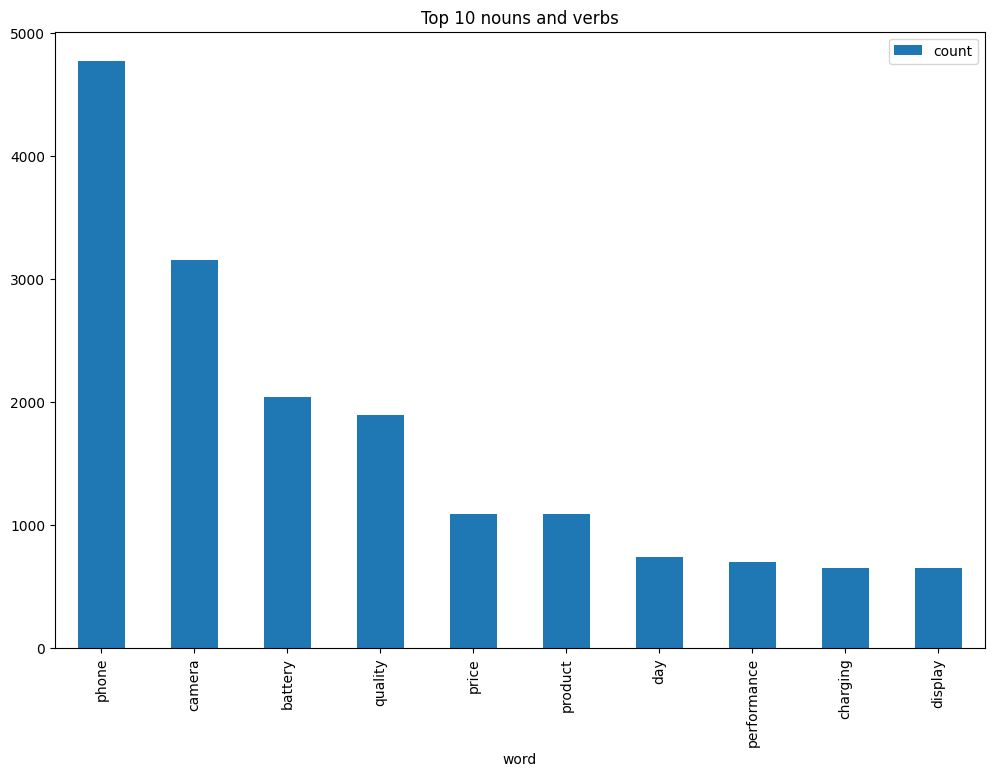

In [104]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

### **Feature Extraction**

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1.Bag of words (Simple vectorization)

2.TF-IDF (Term Frequency - Inverse Document Frequency)

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.

**Feature Extraction for 'Key Words'**

In [105]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

## **Fetch sentiments**

To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways:

a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)

b. Using TextBlob

In [106]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

### **Using NLTK's SentimentIntensityAnalyzer**

In [107]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,9151
neg,845


In [108]:
dataframe.Clean_Reviews[8]

'nice phone good image quality'

In [109]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.6908}

In [113]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Assuming x is a DataFrame containing the 'Clean_Reviews' column
x = pd.DataFrame({'Clean_Reviews': ['I love this product!', 'The quality is great.', 'It was a bad experience.']})

sid = SentimentIntensityAnalyzer()

# Iterate over the 'Clean_Reviews' column and apply sentiment analysis
for review in x['Clean_Reviews']:
    scores = sid.polarity_scores(review)
    print(scores)


{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}
{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}


In [112]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co..."
1,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co..."
2,review using phone month nice phone budget ram...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp..."
3,wide angle camera ki kami h,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,nice battery camera amazing,"{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'comp..."


In [114]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876
1,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...",0.9776
2,review using phone month nice phone budget ram...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.9260
3,wide angle camera ki kami h,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,nice battery camera amazing,"{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'comp...",0.7650


In [115]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876,Positive
1,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...",0.9776,Positive
2,review using phone month nice phone budget ram...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.9260,Positive
3,wide angle camera ki kami h,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,nice battery camera amazing,"{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'comp...",0.7650,Positive
...,...,...,...,...
9991,fantastic camara quality future,"{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'comp...",0.5574,Positive
9992,purchased june delivery promised date little l...,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.9403,Positive
9993,battery good camera also good,"{'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'comp...",0.7003,Positive
9994,nice,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4215,Positive


In [116]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
temp = df.groupby('sentiment').count()['Tweets'].reset_index().sort_values(by='Tweets',ascending=False)
temp.style.background_gradient(cmap='rainbow')

<Axes: xlabel='sentiment', ylabel='count'>

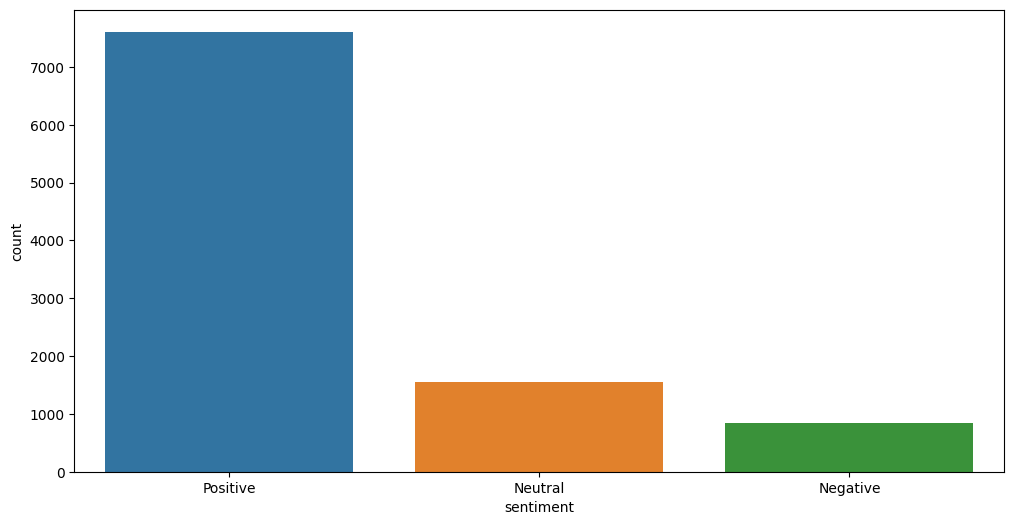

In [118]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<ipython-input-121-b3e96d257d7c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='compound', ylabel='Density'>

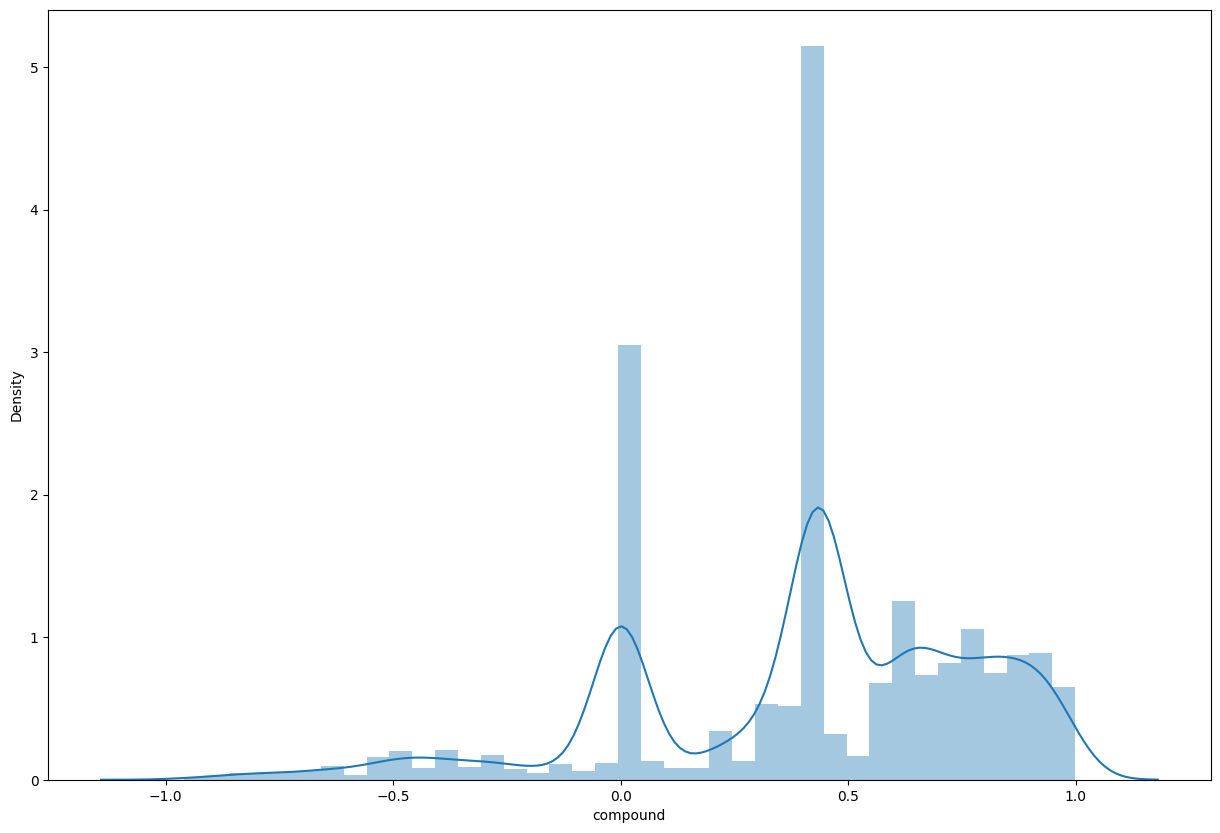

In [121]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

## **Using TextBlob**

In [124]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,9286
neg,710


In [125]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...,0.498519,0.169769
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...,0.875000,0.603125
3,wide angle camera ki kami h,Wide angle camera ki kami h,0.400000,-0.100000
4,nice battery camera amazing,Nice battery+camera is amazing 🤩,0.950000,0.600000


Text(0, 0.5, 'Subjectivity')

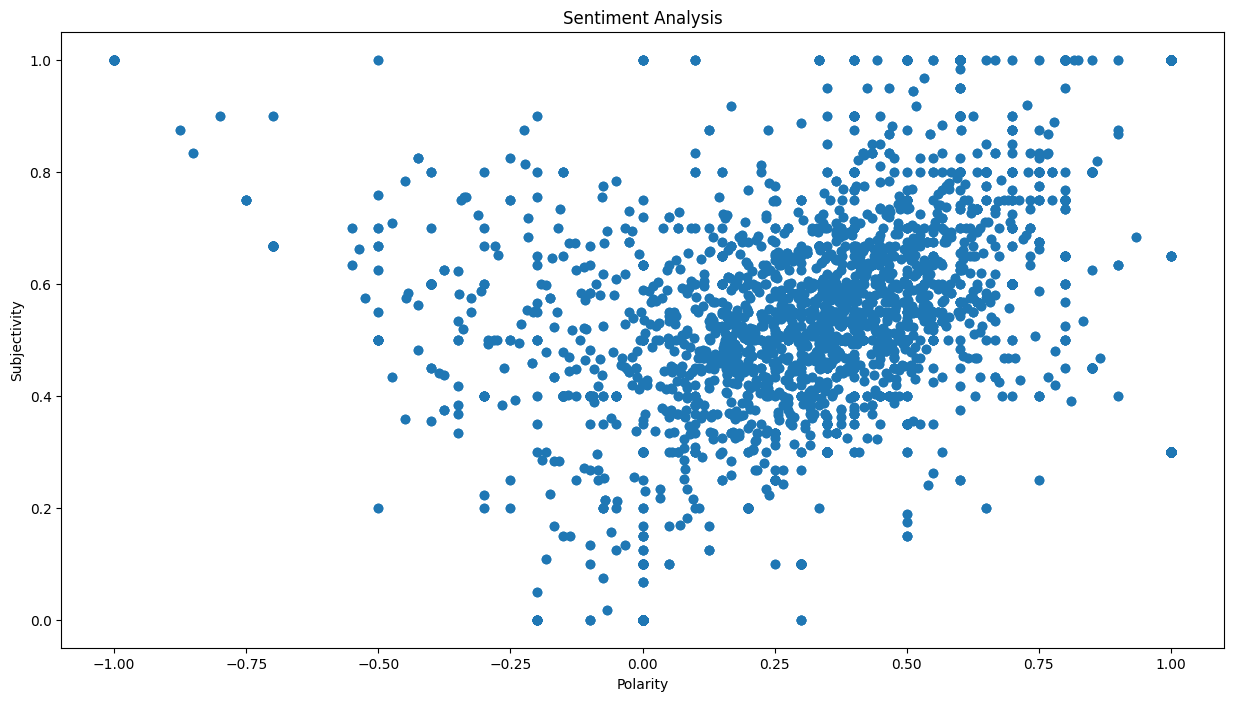

In [126]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [127]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])

In [128]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556,pos
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...,0.498519,0.169769,pos
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...,0.875000,0.603125,pos
3,wide angle camera ki kami h,Wide angle camera ki kami h,0.400000,-0.100000,pos
4,nice battery camera amazing,Nice battery+camera is amazing 🤩,0.950000,0.600000,pos


## **Story Generation and Visualization**

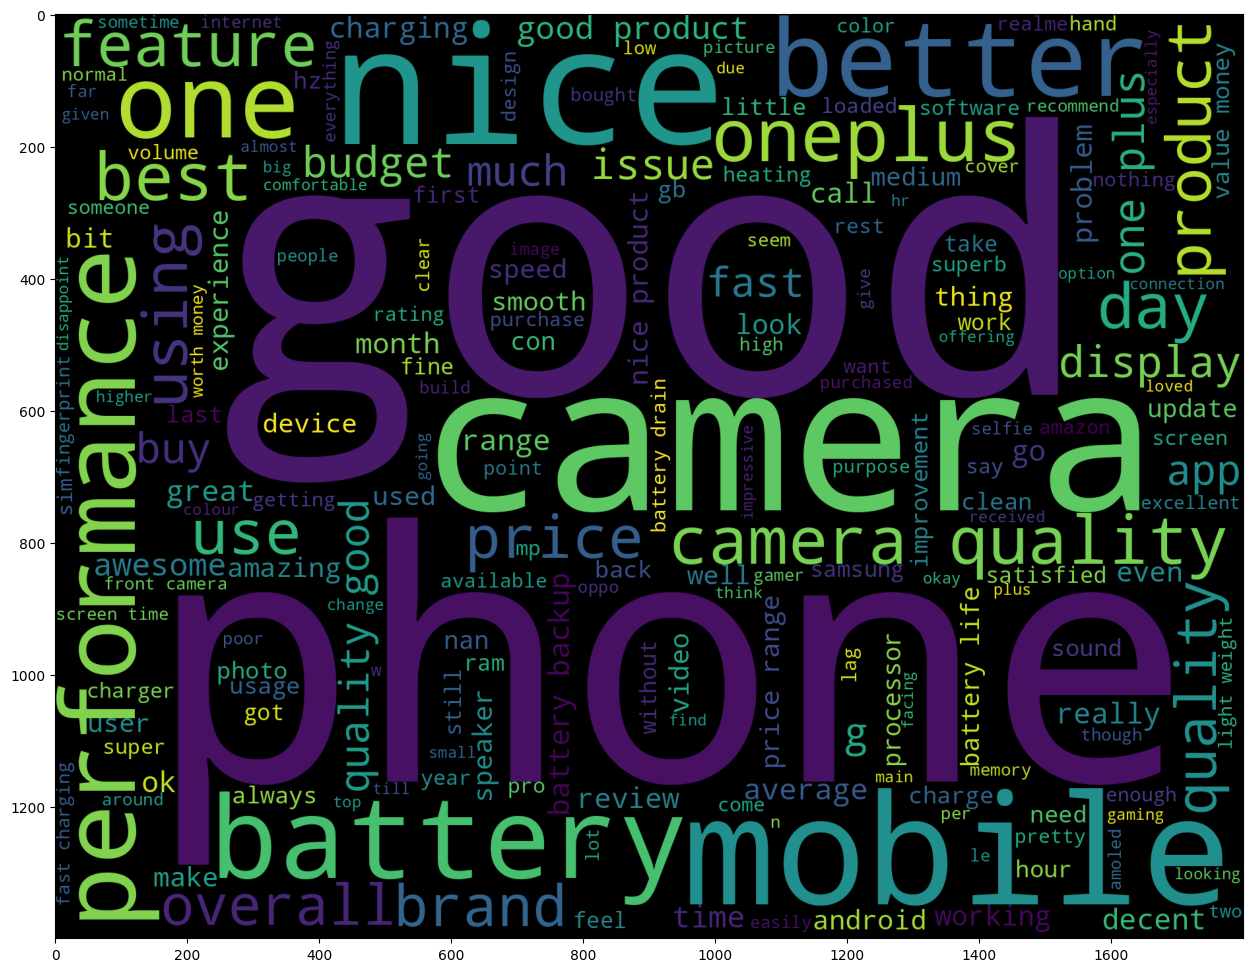

In [129]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

## **Most common words in positive Review**

**Answer can be best found using WordCloud**



In [130]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

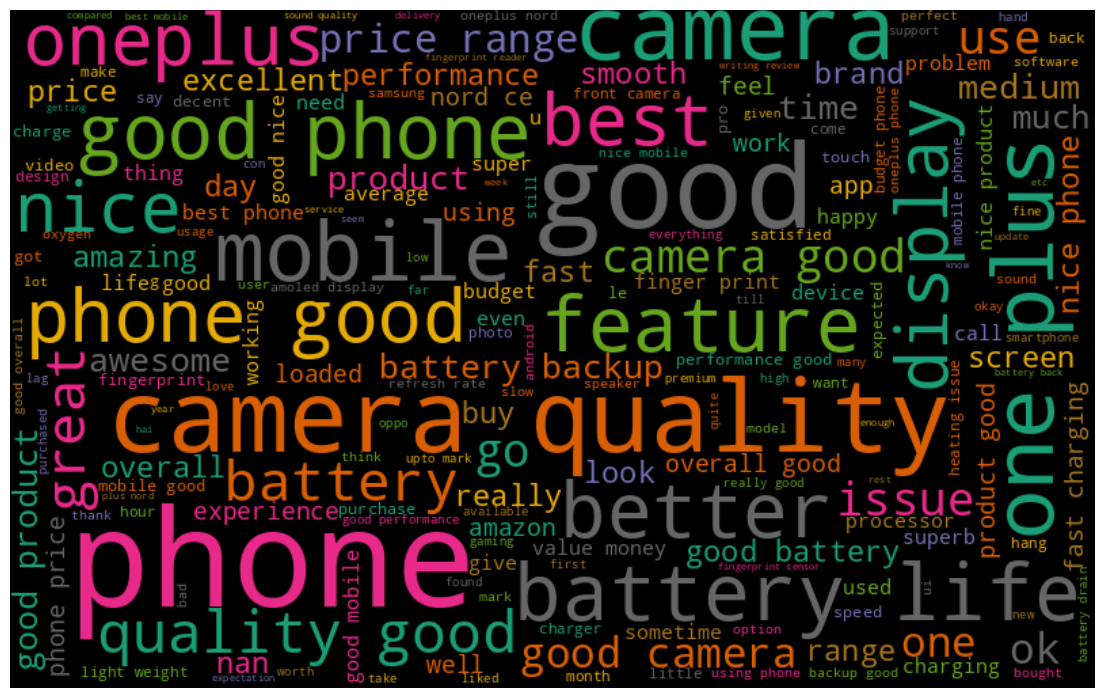

In [132]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)


## **Most common words in negative Review**

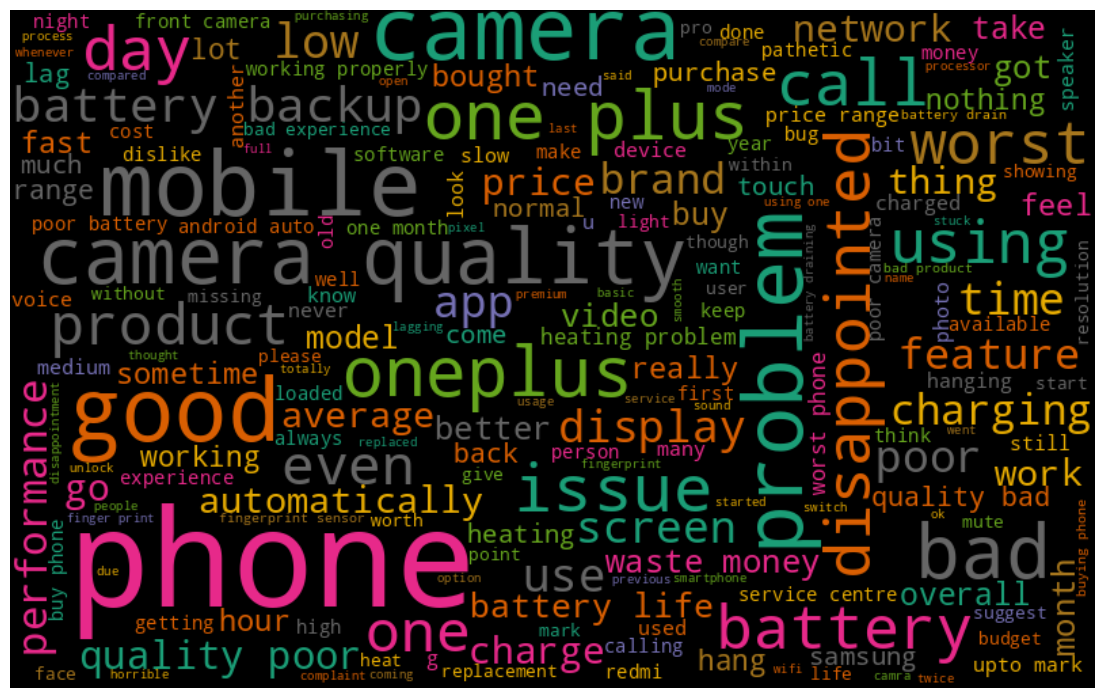

In [133]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)